Num GPUs Available:  1
GPU is available, using GPU for training.
Found 19858 images belonging to 2 classes.
Found 3504 images belonging to 2 classes.
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb2 (Functional)  (None, 7, 7, 1408)       7768569   
                                                                 
 global_average_pooling2d (G  (None, 1408)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 256)               360704    
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                             

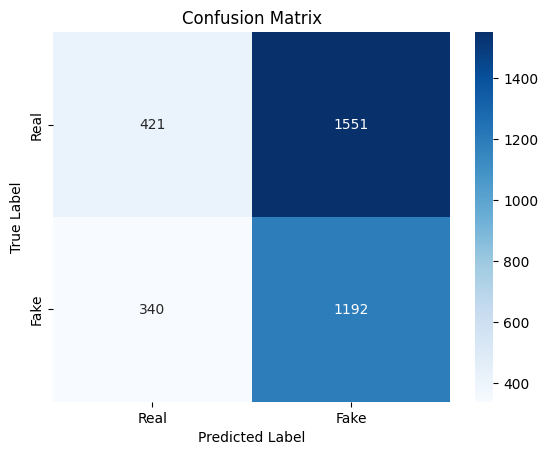

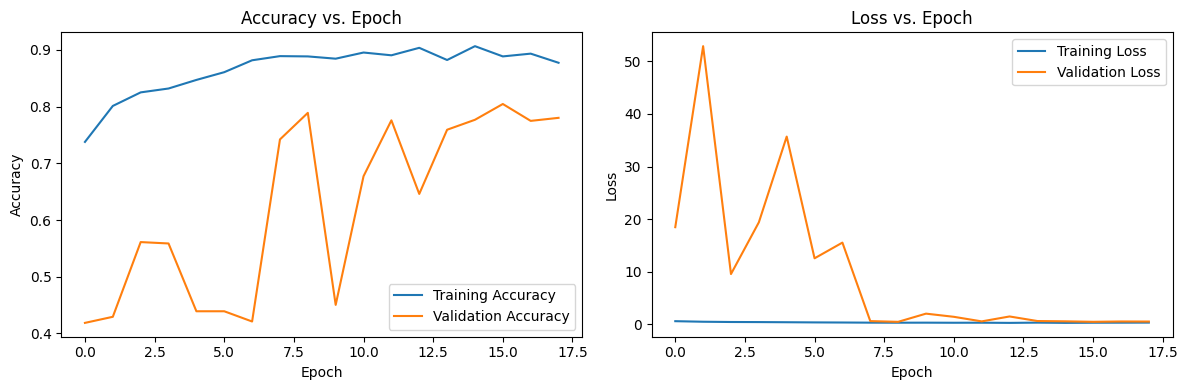

Found 7510 images belonging to 2 classes.
470/470 [==============================] - 152s 322ms/step
[[1]
 [0]
 [0]
 ...
 [1]
 [1]
 [1]]
Classification Report:
              precision    recall  f1-score   support

        Real       1.00      0.42      0.59      3789
        Fake       0.63      1.00      0.77      3721

    accuracy                           0.71      7510
   macro avg       0.81      0.71      0.68      7510
weighted avg       0.81      0.71      0.68      7510

Confusion Matrix:
[[1577 2212]
 [   3 3718]]


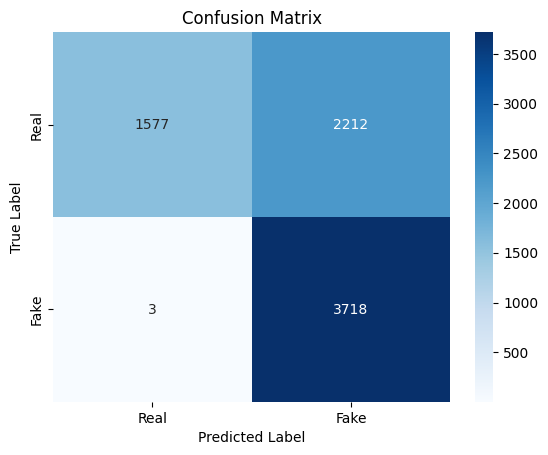

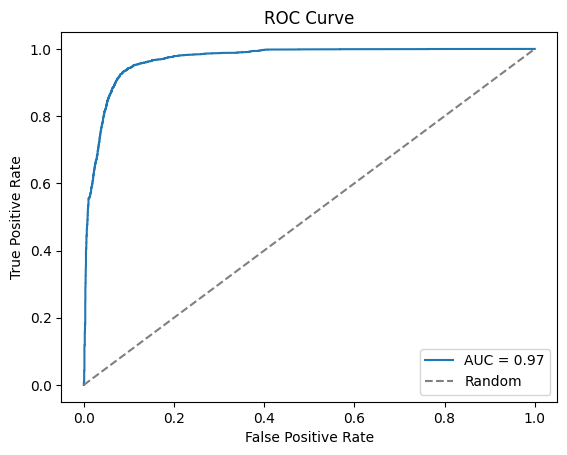

Evaluation Metrics:
accuracy: 0.7050599201065246
precision: 0.9981012658227848
recall: 0.41620480337820004
f1_score: 0.5874464518532315
auc: 0.9694069786732539
Сообщение об окончании работы отправлено в Telegram.
Программа завершила работу.


In [1]:
import model_fit_evaluate
from tensorflow.keras.applications import EfficientNetB2
from tensorflow.keras.applications.efficientnet import preprocess_input as preprocess_input_efficientnetb2
import tensorflow as tf
import os 
import telebot

if __name__ == '__main__':
    data_dir = 'train'
    image_size = (224, 224)
    batch_size = 4  
    epochs = 40

    train_generator, validation_generator = model_fit_evaluate.create_data_generators(data_dir, image_size, batch_size, preprocessing_function=preprocess_input_efficientnetb2)

    model = model_fit_evaluate.create_custom_model(
    base_model=EfficientNetB2, 
    weights="imagenet",
    input_shape=(224, 224, 3),
    num_classes=1, 
    trainable_base=True 
    )

    history = model_fit_evaluate.train_model(model, train_generator, validation_generator, epochs, batch_size, early_stopping_patience=5, reduce_lr_patience=2, reduce_lr_factor=0.3)

    model_fit_evaluate.evaluate_model(model, validation_generator)

    model_fit_evaluate.plot_training_history(history)
    
    test_data_dir = 'test'  

    metrics = model_fit_evaluate.evaluate_model_on_test_data(model, test_data_dir, preprocess_input_efficientnetb2, image_size=image_size, batch_size=16) #Added Image Size

    print("Evaluation Metrics:")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")


Found 10110 images belonging to 2 classes.
632/632 [==============================] - 485s 765ms/step
[[1]
 [0]
 [0]
 ...
 [1]
 [1]
 [1]]
Classification Report:
              precision    recall  f1-score   support

        Real       0.97      0.32      0.48      5089
        Fake       0.59      0.99      0.74      5021

    accuracy                           0.65     10110
   macro avg       0.78      0.66      0.61     10110
weighted avg       0.78      0.65      0.61     10110

Confusion Matrix:
[[1622 3467]
 [  42 4979]]


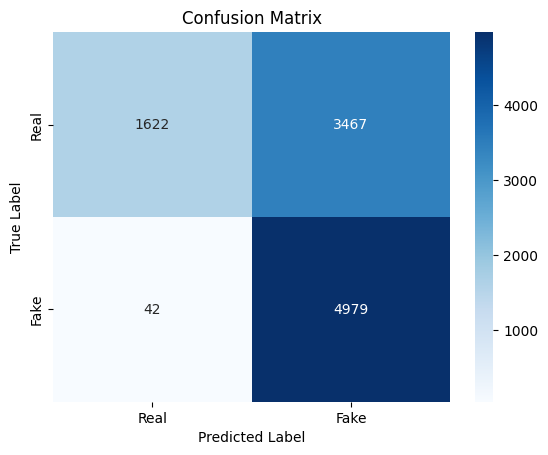

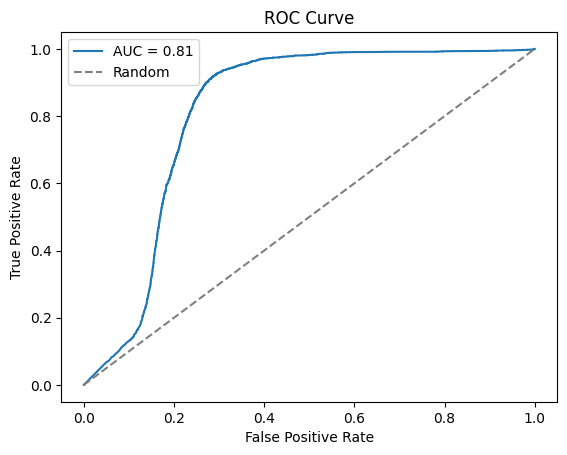

Evaluation Metrics:
accuracy: 0.6529179030662711
precision: 0.9747596153846154
recall: 0.3187266653566516
f1_score: 0.4803790907744706
auc: 0.8147258816957774


In [2]:
    metrics = model_fit_evaluate.evaluate_model_on_test_data(model, 'OF/test', preprocess_input_efficientnetb2, image_size=image_size, batch_size=16) #Added Image Size

    print("Evaluation Metrics:")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")

In [4]:
 model.save('EfficientNetB2_Deepfake.keras')

TypeError: Unable to serialize [2.0896919 2.1128857 2.1081853] to JSON. Unrecognized type <class 'tensorflow.python.framework.ops.EagerTensor'>.